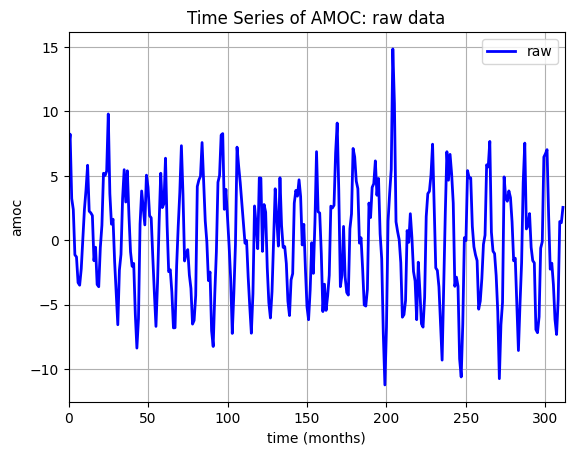

/home/m267zhou/.conda/envs/meixin/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


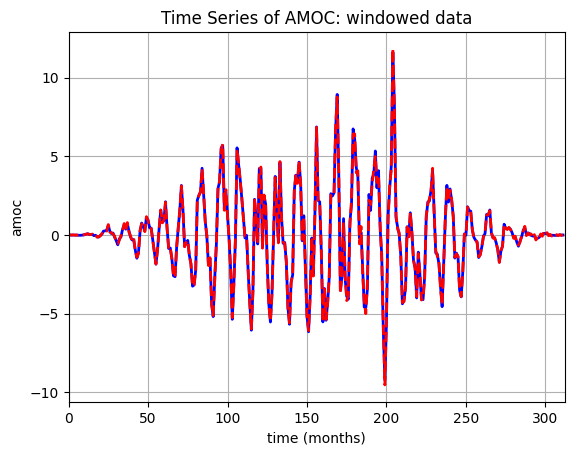

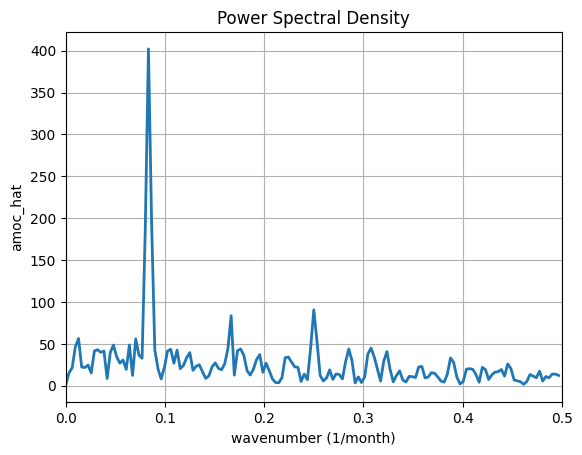

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
from scipy import signal
from scipy import fftpack

import sys

### read in data
with open('10.csv', mode='r') as file:
    reader = csv.reader(file)
    data = np.array(list(reader), dtype='float')

a, N = data.shape
time = data[0,:]
Nh = int(N/2)

data_nomean = data[1,:] - np.mean(data[1,:])

### window data and compute fft
window = signal.windows.get_window('hann', N)
data_windowed = window*data_nomean
k, psd = signal.periodogram(data_windowed)

knew = fftpack.fftfreq(N, d=1)
amoc_hat = fftpack.fft(data_windowed)
power_spectra = np.abs(amoc_hat)

### Filter and invert to find time series
Nfilter = 5
for i in np.arange(1, Nfilter+1):
    amoc_hat[Nh-i], amoc_hat[Nh+i] = 0, 0

amoc_new = fftpack.ifft(amoc_hat)

### plot raw data
plt.plot(time, data_nomean, '-b', label='raw', lw=2)
plt.xlabel('time (months)')
plt.ylabel('amoc')
plt.title('Time Series of AMOC: raw data')
plt.grid('on')
plt.xlim([0, 312])
plt.legend()
plt.show()

### plot windowed data
plt.plot(time, data_windowed, '-b', label='windowed', lw=2)
plt.plot(time, amoc_new, '--r', label='filtered', lw=2)
plt.xlabel('time (months)')
plt.ylabel('amoc')
plt.title('Time Series of AMOC: windowed data')
plt.grid('on')
plt.xlim([0, 312])
plt.show()

### plot periodogram
plt.plot(knew[0:Nh], power_spectra[0:Nh], lw=2)
plt.xlabel('wavenumber (1/month)')
plt.ylabel('amoc_hat')
plt.title('Power Spectral Density')
plt.grid('on')
plt.xlim([k[0], k[-1]])
plt.show()
